<a href="https://colab.research.google.com/github/JunYoung07/Hands-On_Machine_Learning/blob/main/5_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6. 결정 트리 (Decision Tree)

* 분류, 회귀, 다중출력...
* 매우 복잡한 데이터셋도 학습할 수 있는 강력한 알고리즘

## 6-1. 결정 트리 학습고 시각화

* **장점**
    * 데이터 전처리 불필요


* 붓꽃 데이터를 이용해 의사결정나무 모델 학습 후 학습결과 시각화
* 붓꽃을 꽃잎의 길이와 너비 기준으로 분류

#### 의사결정나무 구성요소

* **마디(node)**: 가지치기가 시작되는 지점
* **나무뿌리(root node)**: 맨 상단에 위치한 마디
* **나뭇잎(leaf node)**: 더 이상의 가지치기가 발생하지 않는 마디

### 6-1-1. 의사결정나무 마디 속성
* `gini`: 해당 마디의 **불순도** 측정값
    * 모든 샘플이 동일 클래스에 속하면 불순도가 0. 즉, `gini=0`.
    * 의사결정나무 학습 과정에 사용되는 알고리즘의 비용함수에 사용됨
* `samples`: 해당 마디 결정에 사용된 샘플 수
* `value`: 해당 마디 결정에 사용된 샘플을 클래스 별로 구분한 결과
    * 훈련 샘플의 레이블 정보를 이용하여 분류
* `class`: 각 클래스별 비율을 계산하여 가장 높은 비율에 해당하는 클래스 선정
    * 동일한 비율이면 낮은 인덱스 선정
    * 예를 들어, 깊이 2의 왼편 마디의 클래스별 비율
$$p_0= 0/54, \quad p_1=49/54, \quad p_2 = 5/54$$

In [ ]:
# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
# 학습 데이터 : iris
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier  # 의사결정나무 모델 임포트

iris = load_iris()
X = iris.data[:, 2:]  # 꽃잎 길이, 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42) # max_depth: 의사 결정 나무의 최대 깊이 지정. (연속된 가지치기가 최대 2번)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

![ScreenShot](https://formal.hknu.ac.kr/handson-ml2/slides/images/ch06/homl06-01.png)

## 6-2. 예측하기

* 데이터가 주어지면 나무뿌리에서 시작
* 꽃잎 길이: 2.45cm이하
    * 왼편으로 이동. setosa로 판정
* 꽃잎 길이: 2.45cm초과
    * 오른편으로 이동
        * 꽃잎 너비: 1.75cm 이하
            * 왼편으로 이동. iris-versicolor 판정
        * 꽃잎 너비: 1.75츠 초과
            * 오른편으로 이동. iris-virginica 판정

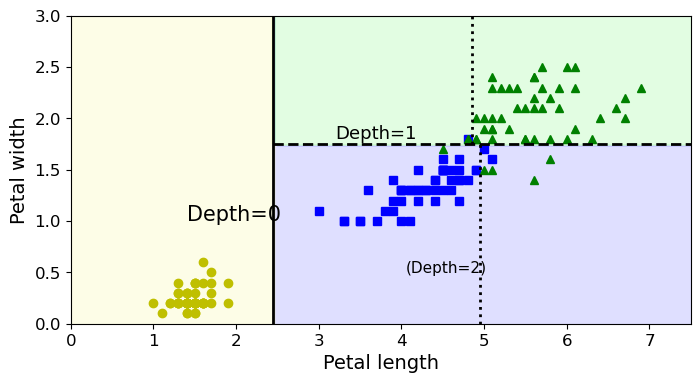

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

* 점선: `max_depth=3`으로 지정한 경우
* `max_depth`값을 크게 잡으면 과대 적합 위험도 커짐

## 6-3. 클래스 확률 추정

* 계산된 클래스별 비율을 이용하여 새로운 샘플에 대한 예측 실행
* **판정**: 가장 높은 확률을 가진 클래스 반환
* 동일한 마디에 속한 샘플에 대한 예측값은 언제나 동일

In [ ]:
tree_clf.predict_proba([[5, 1.5]])  # 클래스별 확률 반환

array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
tree_clf.predict([[5, 1.5]])  # 예측된 클래스의 인덱스 반환

array([1])

## 6-4. CART 훈련 알고리즘

### 6-4-1. 불순도 계산
* **불순도**: 마디에 포함된 `gini`속성
    * $K$는 클래스 수이고, $p_k$는 클래스 $k$에 속한 샘플의 비율
$$G = 1 - \sum_{k=0}^{K-1} p_{k}^2$$

### 6-4-2. CART 알고리즘
* **CART, classification and regression tree**

* 비용함수를 최소화하는 특성 $k$와 해당 특성의 임계값 $t_k$을 결정
    * 탐욕적 알고리즘(Greedy algorithm) 활용
$$J(k, t_k) = \frac{m_\text{left}}{m}\, G_\text{left} + \frac{m_\text{right}}{m}\, G_\text{right}$$
    * $G_\text{left}$($G_\text{right}$): 지정된 특성 $k$와 특성 임계값 $t_k$로 구분된 왼편(오른편) 부분집합의 지니 불순도
        * 각 마디의 지니 불순도를 낮추는 방향으로 학습
    * $m$: 해당 마디의 전체 샘플 수
    * $m_\text{left}$($m_\text{right}$): 지정된 특성$k$와 특성 임계값 $t_k$로 구분된 왼편(오른편) 부분집합의 크기
* $J(k, t_k)$가 작을수록 불순도가 낮은 두 개의 부분집합으로 분할됨
* 탐욕적 알고리즘은 해당 마디에 포함된 샘플을 지니 불순도가 가장 낮은, 즉, 가장 순수한(pure)두 개의 부분 집합으로 분할
* 이렇게 나누는 과정은 `max_depth`깊이에 다다르거나 불순도를 줄이는 분할을 더 이상 찾을 수 없을 때, 또는 다른 규제의 한계에 다다를 때까지 반복

## 6-5. 계산 복잡도

### 6-5-1. 최적의 의사결정 나무 찾기

* 최적의 의사결정나무를 찾는 문제는 NP-complete
* 이런 문제의 시간복잡도는 $O(exp(m))$
* 매우 작은 훈련 세트에 대해서도 제대로 적용하기 어려움

### 6-5-2. 예측 시간 복잡도

* 학습된 의사결정 나무가 예측에 필요한 시간: $O(log m)$
    * 훈련 샘플 수 $m$에만 의존하며 매우 빠름
    * 특성 수와 무관: 각 마디에서 하나의 특성만 분류기준으로 사용

### 6-5-3. 학습 시간 복잡도
* 훈련 샘플이 크기순으로 정렬된 경우
    * 각 마디에서 분류하는 데 걸리는 시간: $O(n* m*log(m))$
    * 의사결정나무를 완성하는 데 걸리는 시간: $O(n*m^2*log(m))$
    * 규제가 있는 경우 좀 더 빨라짐.
* 훈련 샘플을 정렬하는 데 걸리는 시간
    * `DecisionTreeClassifier`의 `presort=True`옵션 설정
        * 훈련 세트를 미리 퀵정렬 시킨 후 학습 시작
    * 훈련 세트가 크면 이 방식은 속도가 늦어짐
        * 퀵정렬 자체의 복잡도: $O(mlog(m))$

## 6-6. 지니 불순도 대 엔트로피

* `DecisionTreeClassifier`의 `criterion="entropy"`옵션 설정:
    * gini불순도 대신에 엔트로피 불순도 사용
* 특정 마디의 엔트로피($H$) 계산
$$H = -\sum_{\substack{k=0\\p_k\neq 0}}^{K-1} p_{k}\, \log(p_k)$$
* 두 불순도의 차이는 크지 않으며, 비슷한 의사결정나무를 생성

* 엔트로피 불순도 특징:
    * 특정 $k$에 대해 만약 $p_k$ 0에 가가운 경우
    * $log(p_k)$: 음의 무한대로 수렴
    * 엔트로피 증가
    * 비용함수 $J(k, t_k)$증가
    * 마디를 보다 균형 잡힌 두 개의 부분집합으로 분할하는 방향으로 유도
* 지니 불순도의 계산이 더욱 빠르기 때문에 기본값으로 사용

## 6-7. 규제 매개변수

### 6-7-1. 비매개변수 모델 대 매개변수 모델

* **비매개변수 모델**(nonparametric model)
    * 훈련 시작 전에 파라미터 수가 결정되지 않는 모델
    * 예제: 의사결정나무. 어떤 모델일 지 미리 지정하지 않음.
        * 마디를 분할할 수 있는 자유도(degree of freedom)제한 없음
    * 과대적합 위험 높음
* **매개변수 모델**(parametric model)
    * 미리 정의된 모델 파라미터 사용
    * 예제: 선형 모델
    * 과대적합 위험도 줄어듦
    * 과소적합 위험도 커짐

### 6-7-2. 사이킷런 `DecisionTreeClassifier`규제

* `max_depth`: 의사결정나무의 최대 높이 제한
* `min_sample_split`: 마디를 분할하기 위해 필요한 최소 샘플 수
* `min_sample_leaf`: 나뭇잎에 포함되어야 하는 최소 샘플 수
* `min_weight_fraction_leaf`:
    * 샘플 별로 가중치가 설정된 경우: 가중치의 전체 합에서 해당 나뭇잎에 포함된 샘플의 가중치의 합이 차지하는 비율
    * 샘플 별로 가중치가 없는 경우: `min_samples_leaf`와 동일한 역할 수행
* `max_leaf_nodes`: 허용된 나뭇잎의 최대 개수
* `max_features`: 각 마디에서 분할 평가에 사용될 수 있는 최대 특성 수
* **규제를 높이는 방법**
    * `min_`: 값을 키울 것
    * `max_`: 값을 감소시킬 것

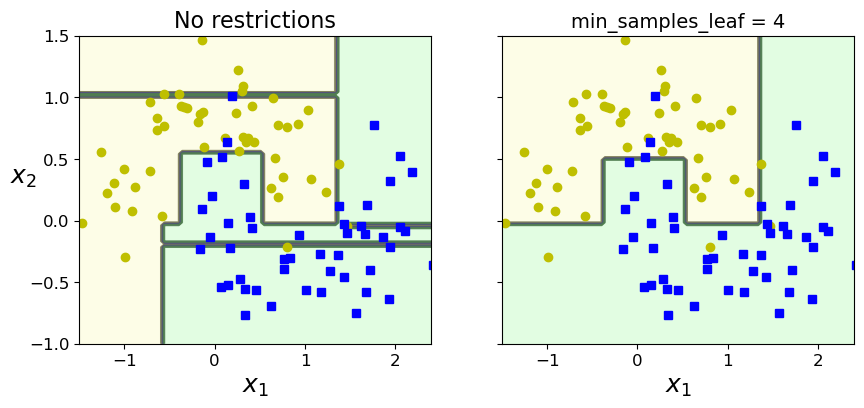

In [ ]:
# 규제 매개 변수 min_samples_leaf사용하기
# moons datasets
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=42)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)  # 분할되기 위해 가져야 할 최소 샘플 수가 없기에 하나만 있어도 분할 해버리는 모습
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

plt.show()

||왼쪽: 규제 없음|오른쪽: `min_samples_leaf=4`|
|:---:|:---:|:---:|
||보다 정교함, 과대 적합|일반화 성능이 좋음|

* **사전 가지치기**: 사이킷런의 `DecisionTreeClassifier`처럼 학습 과정에 사용되는 규제에 따라 분할을 제한
* **사후 가지치기**: 우선 제한 없이 의사결정나무를 훌녈 시킨 뒤에 통계적 가설검정을 이용하여 별로 의미 없는 마디를 잘라내는 기법
    * 사이킷런은 지원하지 않음

## 6-8. 회귀

* 의사결정 나무 알고리즘 아이디어를 거의 그대로 이용하여 회귀 문제에 적용
* 사이킷런의 `DecisionTreeRegressor`예측기 활용

In [ ]:
# 2차식 데이터 생성
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4* (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)  # 트리의 깊이를 2로 설정
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

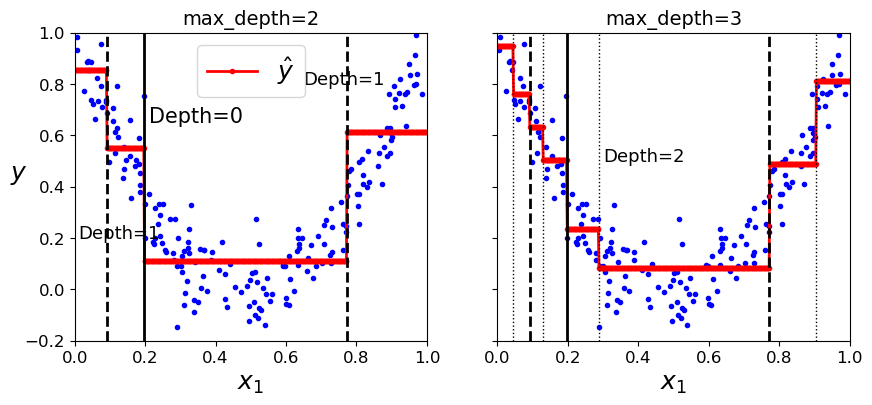

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
    
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

* 왼쪽 그래프에 대한 회귀 그래프
![screenshot](https://formal.hknu.ac.kr/handson-ml2/slides/images/ch06/homl06-05.png)

* 각 마디에 포함된 속성
    * `samples`: 해당 마디에 속한 훈련 샘플 수
    * `value`: 해당 마디에 속한 훈련 샘플의 평균 타깃값
    * `mse`: 해당 마디에 속한 훈련 샘플의 평균제곱오차(mse)
        * 오차 기준은 `value`사용

### 6-8-1. 회귀용 CART 알고리즘의 비용함수


* 아래의 비용함수를 최소화하는 특성 $k$와 해당 특성의 임계값 $t_k$을 결정
    * 탐욕적 알고리즘(greedy algorithm) 활용
    * 각 마디의 평균제곱오차 $\text{MSE}$를 최소화하는 방향으로 학습
$$J(k, t_k) = \frac{m_\text{left}}{m}\, \text{MSE}_\text{left} + \frac{m_\text{right}}{m}\, \text{MSE}_\text{right}$$

* $\text{MSE}_\text{left}$($\text{MSE}_\text{right}$): 지정된 특성 $k$와 특성 임계값 $t_k$로 구분된 왼편(오른편) 부분 집합의 평균제곱오차(mse)
    * 해당 마디에 속한 샘플들의 평균 타깃값 기준
    * $m_\text{node}$: 해당 마디에 속하는 샘플 수
    * $y^{(i)}$: 샘플 $i$에 대한 레이블
$$\begin{align*}
\text{MSE}_\text{node} &= \sum_{i\in \text{node}} (\hat y_{node} - y^{(i)})^2\\
\hat y_\text{node} &= \frac{1}{m_\text{node}} \sum_{i\in\text{node}} y^{(i)}
\end{align*}$$

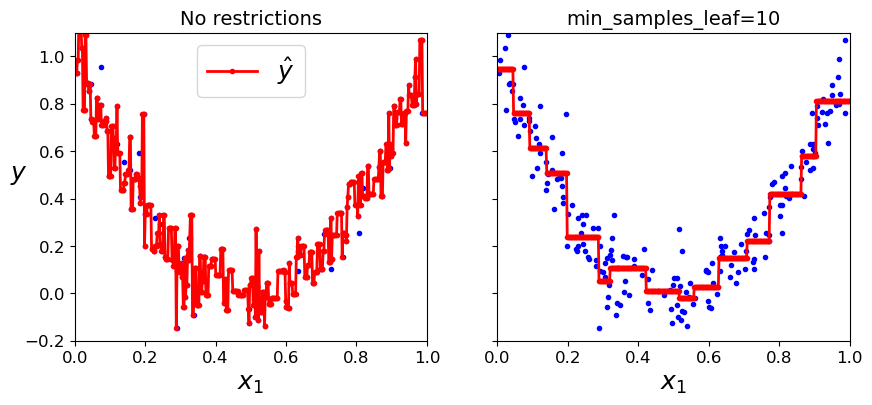

In [ ]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

||왼쪽: 규제 없음|오른쪽: `min_samples_leaf=10`|
|:---:|:---:|:---:|
||과대 적합|나름 괜찮음|

## 6-9. 불안정성

* 의사결정나무 알고리즘은 성능이 매우 우수하지만 기본적으로 주어진 훈련 세트에 민감하게 반응

* **단점**
    * 훈련 세트의 회전에 민감
        * 의사결정나무는 항상 축에 수직인 분할을 사용
        * 조금만 회전을 가해도 결정경계가 많이 달라짐
    * 훈련 세트의 작은 변화에 민감
        * 하나의 샘플을 제거한 후 학습시킬 때 매우 다르게 학습할 수 있음

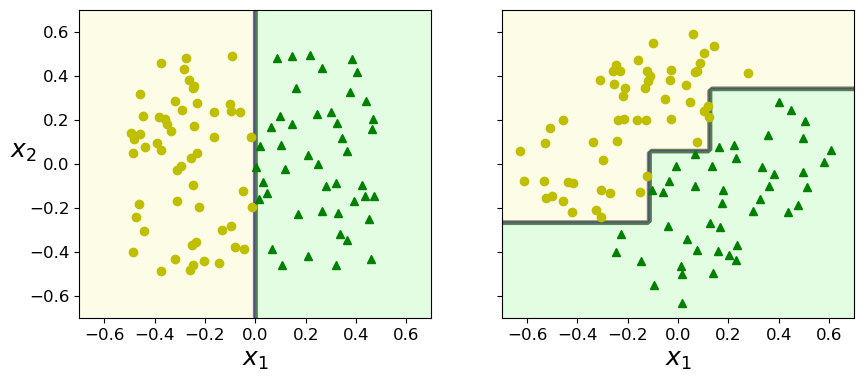

In [ ]:
# 회전 민감성
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

plt.show()